# **Nothing new, wash your hands!**

Dr. Ignaz Philipp Semmelweis was a Hungarian physician and scientist, now known as an early pioneer of antiseptic procedures. Described as the "saviour of mothers", Semmelweis discovered that the incidence of puerperal fever could be drastically cut by the use of hand disinfection in obstetrical clinics. 

Dr. Semmelweis suspected that the 10% of women dying from childbirth was related to improper antiseptic procedures in the delivery room. He introduced new handwashing procedure using chlorinated lime solutions, which reduced the mortality rate of women in labor and giving him a slogon "Saviour of Mothers".

source: https://en.wikipedia.org/wiki/Ignaz_Semmelweis

The following analysis is from data collected from Dr. Semmelweis's two clinics between 1841 and 1849.

### **Import Lebraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style('darkgrid')

### **Import Yearly Dataset**

In [36]:
yearly = pd.read_csv('survey-data/yearly_deaths_by_clinic.csv')
yearly

,year,births,deaths,clinic,proportion
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004


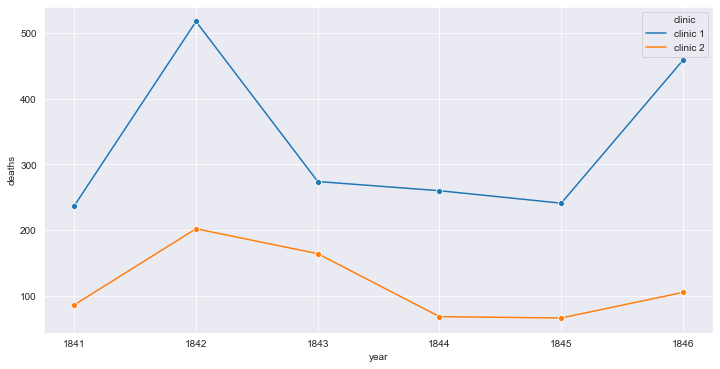

In [68]:
plt.figure(figsize = (12, 6))
sns.lineplot(data = yearly, x = 'year', y = 'deaths', hue = 'clinic', marker = 'o')
plt.show()

### **Import Monthly Dataset**

In [34]:
monthly = pd.read_csv('survey-data/monthly_deaths.csv')
monthly

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12


In [38]:
# Convert date feature to datetime type
monthly.date = pd.to_datetime(monthly.date)

In the summer, June of 1847 the proportion of deaths is drastically reduced which when Dr. Semmelweis made handwashing obligatory.

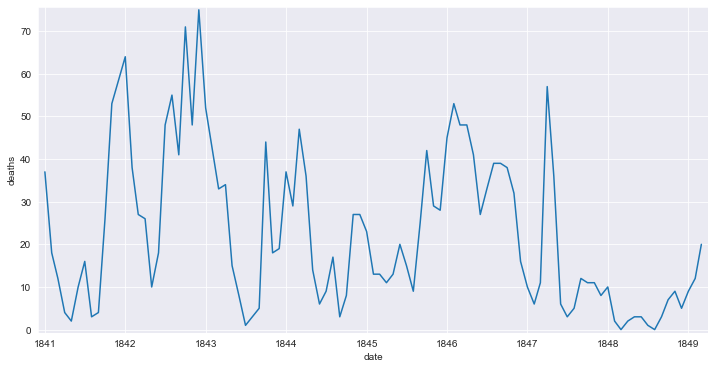

In [66]:
plt.figure(figsize = (12, 6))
sns.lineplot(data = monthly, x = 'date', y = 'deaths')
plt.margins(0.01)
plt.show()

In [58]:
# Create new feature of deaths proportion
monthly["proportion_deaths"] = monthly.deaths/ monthly.births
monthly

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843
...,...,...,...,...
93,1848-11-01,310,9,0.029032
94,1848-12-01,373,5,0.013405
95,1849-01-01,403,9,0.022333
96,1849-02-01,389,12,0.030848


In [59]:
# Seperate dataset into before 1847-06-01 and after
before = monthly[monthly.date < pd.to_datetime('1847-06-01')] 
after = monthly[monthly.date >= pd.to_datetime('1847-06-01')]

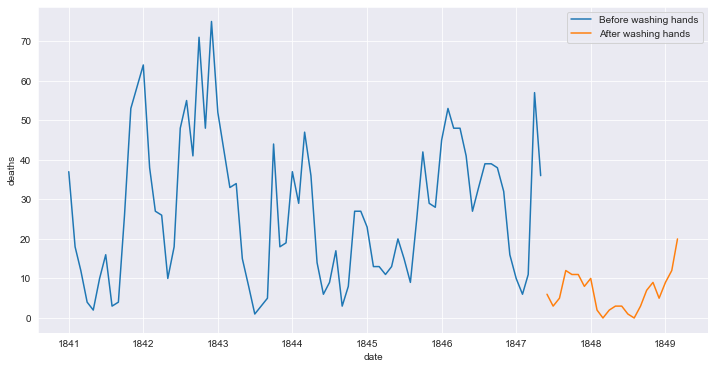

In [74]:
plt.figure(figsize = (12, 6))

sns.lineplot(data = before, x = 'date', y = 'deaths', label = 'Before washing hands')
sns.lineplot(data = after, x = 'date', y = 'deaths', label = 'After washing hands')
# plt.margins(0.005)

plt.show()

### **Average Reduction in Proportion of Deaths**

In [75]:
# Calculate the difference of after / before average 
after_prop = after.proportion_deaths
before_prop = before.proportion_deaths
diff = after_prop.mean() - before_prop.mean()
diff

-0.0839566075118334

It reduced the proportion of deaths by around 8 percentage points! From 10% on average to just 2% (which is still a high number by modern standards). The more hand-washing, the less death.

### **Bootstrap Analysis**

To get a feeling for the uncertainty around how much handwashing reduces mortalities

A bootstrap analysis is a quick way of getting at the uncertainty of an estimate, in this case the estimate is the mean difference was calculated which is -0.0839. It works by simulating redoing the data collection by drawing randomly from the data and allowing a value to be drawn many times.

In [79]:
boot_mean_diff = []

for i in range(50000):
    boot_before = before_prop.sample(frac=1, replace=True)
    boot_after = after_prop.sample(frac=1, replace=True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025   -0.100948
0.975   -0.067065
dtype: float64

So handwashing reduced the proportion of deaths by between 6.7% and 10% , according to a 95% confidence interval. It seems that Dr. Semmelweis had solid evidence that handwashing was a simple but highly effective procedure that could save many lives.